#  Lead Scoring Case Study

### Steps
- Importing the libraries
- Loading the dataset
- Understanding the problem statement
- Data understanding
- Missing value check
- EDA
- Preprocessing - Dummy creation
- Train-Test Split
- Scaling
- Feature Selection - RFE
- Modeling
- Manual Feature selection 
- Model evaluation 

### Importing the libraries

In [4266]:
### Libraries for Data Analysis and numerical functions
import numpy      as np
import pandas     as pd

### Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn           as sns

### Supress warnings
import warnings
warnings.filterwarnings("ignore")

### Logistic regression Libraries
import statsmodels
import statsmodels.api    as sm
from   statsmodels.stats.outliers_influence  import variance_inflation_factor

### Sci-kit Libraries
import sklearn
from   sklearn.linear_model      import  LogisticRegression
from   sklearn.preprocessing     import  StandardScaler
from   sklearn.preprocessing     import  MinMaxScaler
from   sklearn.feature_selection import  RFE
from   sklearn.model_selection   import  train_test_split

### Libraries for Mectrics
from   sklearn                   import  metrics
from   sklearn.metrics           import  r2_score
from   sklearn.metrics           import  precision_score, recall_score
from   sklearn.metrics           import  precision_recall_curve
from   sklearn.metrics           import  roc_curve

### Loading the dataset

In [4268]:
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Problem Statement:
Select the most promising Leads for the online Education platform, that are most likely to convert into paying customers. The company requires to build a model where in you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower score have a lower conversion rate. The target lead conversion rate is expected to be around 80%.

#### Understanding the data

In [4271]:
Leads.shape

(9240, 37)

In [4272]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Checking missing values

In [4274]:
def null_percentage(column):
    return column.isnull().mean() * 100

Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 30]
print(Leads_null)

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64


In [4275]:
### Drop columns having missing values greater than 30% of the data
drop_null_cols = Leads_null.index
Leads.drop(columns=drop_null_cols, axis=1, inplace=True)

In [4276]:
### Shape of the dataset after dropping columns greater than 30% null values
Leads.shape

(9240, 31)

In [4277]:
Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 0].sort_values(ascending=False)
print(Leads_null)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64


In [4278]:
for i in Leads_null.index:
    col_det = Leads[i].value_counts()
    print(col_det)
    print('_'*50)

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
__________________________________________________
Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64
__________________________________________________
What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
__________________________________________________
Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Aust

In [4279]:
### Some of the features are having level as 'Select', it means the details was not provided and this can also be treated as missing.
### Dropping features which have high missing values.  
Leads = Leads.drop(["What matters most to you in choosing a course", "Lead Profile", "How did you hear about X Education"], axis=1)

In [4280]:
def null_percentage(column):
    return column.isnull().mean() * 100

Leads_null = Leads.apply(null_percentage)
Leads_null = Leads_null[Leads_null > 0].sort_values(ascending=False)
print(Leads_null)

What is your current occupation    29.112554
Country                            26.634199
Specialization                     15.562771
City                               15.367965
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
dtype: float64


In [4281]:
#### The feature, "What is your current occupation" is having high missing values.  The rows having missing values can be dropped.
Leads = Leads[~(Leads["What is your current occupation"].isnull())]

In [4282]:
Leads.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  130
Total Time Spent on Website                    0
Page Views Per Visit                         130
Last Activity                                103
Country                                     1605
Specialization                                18
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

In [4283]:
### The feature "Page Views Per Visit" is having 130 missing values. These rows can be dropped
Leads = Leads[~(Leads["Page Views Per Visit"].isnull())]

In [4284]:
Leads.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   29
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
Country                                     1475
Specialization                                18
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

In [4285]:
Leads.shape

(6420, 28)

In [4286]:
#### Feature, "Lead Source" is having 29 missing values. These rows can be dropped
Leads = Leads[~(Leads["Lead Source"].isnull())]

In [4287]:
Leads.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
Country                                     1447
Specialization                                18
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

In [4288]:
### Feature, "Specialization" is having 18 missing values. These rows can be dropped
Leads = Leads[~(Leads["Specialization"].isnull())]

In [4289]:
Leads.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
Country                                     1447
Specialization                                 0
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

In [4290]:
Leads.shape

(6373, 28)

In [4291]:
### The X company is mainly focusing on online education, so location of the student does not matter much.
### So the columns, "Country" & "City" can be dropped
Leads = Leads.drop(["Country", "City"], axis=1)

In [4292]:
Leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

In [4293]:
### Features "Prospect ID" and "Lead number' are unique and is not necessary for model building so dropping them.
Leads = Leads.drop(["Prospect ID", "Lead Number"], axis=1)

In [4294]:
Leads.shape

(6373, 24)

In [4295]:
for i in Leads.columns:
    col_det = Leads[i].value_counts()
    print(col_det)
    print('_'*50)

Lead Origin
Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
__________________________________________________
Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64
__________________________________________________
Do Not Email
No     5938
Yes     435
Name: count, dtype: int64
__________________________________________________
Do Not Call
No     6371
Yes       2
Name: count, dtype: int64
__________________________________________________
Converted
0    3308
1    3065
Name: count, dtype: i

In [4296]:
### Features having no or less variation does not offer good insights in model building. Such features can be dropped
drop_cols = ["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", 
             "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
             "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]

Leads = Leads.drop(drop_cols, axis=1)

In [4297]:
Leads.shape

(6373, 12)

In [4298]:
Leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Data Preparation/Preprocessing

#### Create dummy variables for categorical columns with multiple levels

In [4301]:
dummy_list = Leads.columns[Leads.dtypes == 'object'].tolist()
print(dummy_list)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [4302]:
Leads = Leads.rename(columns={"What is your current occupation": "Occupation",
                              "A free copy of Mastering The Interview": "Mastering_Interview"})

In [4303]:
dummy_var = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
                                  'Occupation', 'Mastering_Interview', 
                                  'Last Notable Activity']], dtype=int, drop_first=True)

In [4304]:
Leads_Transformed = pd.concat([Leads, dummy_var], axis=1)

In [4305]:
dummy_spl = pd.get_dummies(Leads["Specialization"], prefix="Specialization", drop_first=True, dtype=int)
dummy_spl = dummy_spl.drop("Specialization_Select", axis=1)
Leads_Transformed = pd.concat([Leads_Transformed, dummy_spl], axis=1)

In [4306]:
Leads_Transformed.shape

(6373, 82)

In [4307]:
Leads_Transformed = Leads_Transformed.drop(Leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
                                            'Occupation', 'Mastering_Interview', 'Specialization',
                                            'Last Notable Activity']], axis=1)
Leads_Transformed.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model building procedure

### Train-Test Split

In [4310]:
### creating X & y 
X = Leads_Transformed.drop("Converted", axis=1)
y = Leads_Transformed["Converted"]

In [4311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [4312]:
print("Train dataset size: ", X_train.shape)
print("Test dataset size:  ", X_test.shape)

Train dataset size:  (5098, 73)
Test dataset size:   (1275, 73)


### Scaling

In [4314]:
scaler = MinMaxScaler()
X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4719,0.019920,0.632042,0.15625,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4453,0.007968,0.693222,0.12500,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5770,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1774,0.011952,0.556338,0.18750,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,0.007968,0.558099,0.12500,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4315]:
### Percentage of successful Leads
Success = (sum(Leads_Transformed["Converted"])/len(Leads_Transformed["Converted"].index))*100
Success

48.093519535540565

#### Feature Selection using RFE - automated process

In [4317]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [4318]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 47),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Cli

In [4319]:
cols = X_train.columns[rfe.support_].tolist()
print(cols)

['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed', 'Occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Unreachable']


### Build the first model

In [4321]:
X_train_sm = sm.add_constant(X_train[cols])

model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5082
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2366.1
Date:                Thu, 19 Dec 2024   Deviance:                       4732.3
Time:                        17:15:02   Pearson chi2:                 5.39e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0154      0.597     -1.701      0.089      -2.186       0.155
TotalVisits                                       11.3363      2.542      4.459      0.000       6.353      16.319
Total Time Spent on Website                        4.5056      0.175     25.763      0.000       4.163       4.848
Lead Origin_Lead Add Form                          2.9789      1.195      2.493      0.013       0.637       5.321
Lead Source_Olark Chat                             1.4956      0.114     13.080      0.000       1.271       1.720
Lead Source_Reference                              1.1714      1.213      0.966      0.334      -1.206       3.549
Lead Source_Welingak Website                       3.4748      1.561      2.226      0.026       0.416       6.534
Do Not Email_Yes                                  -1.4063      0.179     -7.871      0.000      -1.757      -1.056
Last Activity_Had a Phone Conversation             1.1259      0.966      1.166      0.244      -0.767       3.019
Last Activity_SMS Sent                             1.2524      0.077     16.216      0.000       1.101       1.404
Occupation_Housewife                              22.6486   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
Occupation_Student                                -1.1732      0.623     -1.884      0.060      -2.393       0.047
Occupation_Unemployed                             -1.3853      0.592     -2.340      0.019      -2.546      -0.225
Occupation_Working Professional                    1.1880      0.616      1.928      0.054      -0.020       2.396
Last Notable Activity_Had a Phone Conversation    22.9705   1.85e+04      0.001      0.999   -3.62e+04    3.62e+04
Last Notable Activity_Unreachable                  2.9393      0.797      3.690      0.000       1.378       4.501
==================================================================================================================
"""

In [4322]:
### calculate VIF

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
print(vif_data)

                                           Feature         VIF
0                                            const  289.639764
1                                      TotalVisits    1.135587
2                      Total Time Spent on Website    1.279136
3                        Lead Origin_Lead Add Form   85.012632
4                           Lead Source_Olark Chat    1.255182
5                            Lead Source_Reference   67.842614
6                     Lead Source_Welingak Website   21.186711
7                                 Do Not Email_Yes    1.013210
8           Last Activity_Had a Phone Conversation    2.499246
9                           Last Activity_SMS Sent    1.049725
10                            Occupation_Housewife    1.445691
11                              Occupation_Student    9.221331
12                           Occupation_Unemployed   34.329514
13                 Occupation_Working Professional   27.616328
14  Last Notable Activity_Had a Phone Conversation    2

In [4323]:
#### Remove the column "Last Notable Activity_Had a Phone Conversation", due to high p value
cols.remove("Last Notable Activity_Had a Phone Conversation")

#### Model 2 after dropping column "Last Notable Activity_Had a Phone Conversation"

In [4325]:
X_train_sm = sm.add_constant(X_train[cols])

model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5083
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2369.1
Date:                Thu, 19 Dec 2024   Deviance:                       4738.1
Time:                        17:15:02   Pearson chi2:                 5.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0164      0.597     -1.703      0.089      -2.186       0.154
TotalVisits                               11.4291      2.544      4.492      0.000       6.442      16.416
Total Time Spent on Website                4.4996      0.175     25.745      0.000       4.157       4.842
Lead Origin_Lead Add Form                  2.9786      1.195      2.493      0.013       0.636       5.321
Lead Source_Olark Chat                     1.4953      0.114     13.078      0.000       1.271       1.719
Lead Source_Reference                      1.1693      1.213      0.964      0.335      -1.208       3.547
Lead Source_Welingak Website               3.4748      1.561      2.226      0.026       0.416       6.534
Do Not Email_Yes                          -1.4064      0.179     -7.872      0.000      -1.757      -1.056
Last Activity_Had a Phone Conversation     2.8581      0.794      3.600      0.000       1.302       4.414
Last Activity_SMS Sent                     1.2522      0.077     16.218      0.000       1.101       1.404
Occupation_Housewife                      21.6500   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
Occupation_Student                        -1.1717      0.622     -1.882      0.060      -2.392       0.048
Occupation_Unemployed                     -1.3839      0.592     -2.338      0.019      -2.544      -0.224
Occupation_Working Professional            1.1877      0.616      1.928      0.054      -0.020       2.395
Last Notable Activity_Unreachable          2.9382      0.797      3.688      0.000       1.377       4.499
==========================================================================================================
"""

In [4326]:
### calculate VIF

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
print(vif_data)

                                   Feature         VIF
0                                    const  289.639380
1                              TotalVisits    1.135297
2              Total Time Spent on Website    1.279133
3                Lead Origin_Lead Add Form   85.012631
4                   Lead Source_Olark Chat    1.255091
5                    Lead Source_Reference   67.842490
6             Lead Source_Welingak Website   21.186711
7                         Do Not Email_Yes    1.013209
8   Last Activity_Had a Phone Conversation    1.004367
9                   Last Activity_SMS Sent    1.049716
10                    Occupation_Housewife    1.445690
11                      Occupation_Student    9.221330
12                   Occupation_Unemployed   34.329505
13         Occupation_Working Professional   27.616320
14       Last Notable Activity_Unreachable    1.005392


In [4327]:
### Drop column "What is your current occupation_Housewife" due to high p vlaue
cols.remove("Occupation_Housewife")

### Model 3 after removing column "What is your current occupation_Housewife"

In [4329]:
X_train_sm = sm.add_constant(X_train[cols])

model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5084
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2371.3
Date:                Thu, 19 Dec 2024   Deviance:                       4742.6
Time:                        17:15:03   Pearson chi2:                 5.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.4667      0.553     -0.844      0.398      -1.550       0.617
TotalVisits                               11.2500      2.533      4.441      0.000       6.285      16.215
Total Time Spent on Website                4.4975      0.175     25.741      0.000       4.155       4.840
Lead Origin_Lead Add Form                  2.9745      1.195      2.489      0.013       0.632       5.317
Lead Source_Olark Chat                     1.4907      0.114     13.050      0.000       1.267       1.715
Lead Source_Reference                      1.1710      1.213      0.965      0.334      -1.206       3.548
Lead Source_Welingak Website               3.4751      1.561      2.227      0.026       0.416       6.534
Do Not Email_Yes                          -1.4085      0.179     -7.877      0.000      -1.759      -1.058
Last Activity_Had a Phone Conversation     2.8590      0.794      3.601      0.000       1.303       4.415
Last Activity_SMS Sent                     1.2519      0.077     16.215      0.000       1.101       1.403
Occupation_Student                        -1.7173      0.582     -2.951      0.003      -2.858      -0.577
Occupation_Unemployed                     -1.9293      0.549     -3.514      0.000      -3.006      -0.853
Occupation_Working Professional            0.6420      0.575      1.117      0.264      -0.485       1.769
Last Notable Activity_Unreachable          2.9361      0.797      3.685      0.000       1.374       4.498
==========================================================================================================
"""

In [4330]:
### calculate VIF

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
print(vif_data)

                                   Feature         VIF
0                                    const  201.348018
1                              TotalVisits    1.134562
2              Total Time Spent on Website    1.279119
3                Lead Origin_Lead Add Form   85.012609
4                   Lead Source_Olark Chat    1.254944
5                    Lead Source_Reference   67.841926
6             Lead Source_Welingak Website   21.186710
7                         Do Not Email_Yes    1.013154
8   Last Activity_Had a Phone Conversation    1.004367
9                   Last Activity_SMS Sent    1.049700
10                      Occupation_Student    6.680655
11                   Occupation_Unemployed   23.814760
12         Occupation_Working Professional   19.388554
13       Last Notable Activity_Unreachable    1.004345


In [4331]:
### Remove column "Lead Source_Reference" due to high p value & VIF
cols.remove("Lead Source_Reference")

#### Model 4 after dropping column, "Lead Source_Reference"

In [4333]:
X_train_sm = sm.add_constant(X_train[cols])

model4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5085
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2371.7
Date:                Thu, 19 Dec 2024   Deviance:                       4743.4
Time:                        17:15:04   Pearson chi2:                 5.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3651
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.4661      0.553     -0.843      0.399      -1.549       0.617
TotalVisits                               11.2493      2.534      4.440      0.000       6.284      16.215
Total Time Spent on Website                4.4975      0.175     25.740      0.000       4.155       4.840
Lead Origin_Lead Add Form                  4.1162      0.233     17.658      0.000       3.659       4.573
Lead Source_Olark Chat                     1.4906      0.114     13.049      0.000       1.267       1.715
Lead Source_Welingak Website               2.3334      1.031      2.264      0.024       0.313       4.353
Do Not Email_Yes                          -1.4072      0.179     -7.875      0.000      -1.757      -1.057
Last Activity_Had a Phone Conversation     2.8593      0.794      3.602      0.000       1.303       4.415
Last Activity_SMS Sent                     1.2518      0.077     16.215      0.000       1.101       1.403
Occupation_Student                        -1.7169      0.582     -2.951      0.003      -2.857      -0.577
Occupation_Unemployed                     -1.9300      0.549     -3.516      0.000      -3.006      -0.854
Occupation_Working Professional            0.6421      0.575      1.117      0.264      -0.485       1.769
Last Notable Activity_Unreachable          2.9364      0.797      3.685      0.000       1.375       4.498
==========================================================================================================
"""

In [4334]:
### calculate VIF

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
print(vif_data)

                                   Feature         VIF
0                                    const  201.336461
1                              TotalVisits    1.134530
2              Total Time Spent on Website    1.278256
3                Lead Origin_Lead Add Form    1.542864
4                   Lead Source_Olark Chat    1.254135
5             Lead Source_Welingak Website    1.287278
6                         Do Not Email_Yes    1.013144
7   Last Activity_Had a Phone Conversation    1.004365
8                   Last Activity_SMS Sent    1.049653
9                       Occupation_Student    6.680638
10                   Occupation_Unemployed   23.813996
11         Occupation_Working Professional   19.388296
12       Last Notable Activity_Unreachable    1.004336


In [4335]:
### Column, "What is your current occupation_Working Professional" is having high p value & VIF, It can be removed
cols.remove("Occupation_Working Professional")

#### Model 5 after dropping "Occupation_Working Professional"

In [4337]:
X_train_sm = sm.add_constant(X_train[cols])

model5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.3
Date:                Thu, 19 Dec 2024   Deviance:                       4744.5
Time:                        17:15:04   Pearson chi2:                 5.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1243      0.181      0.687      0.492      -0.231       0.479
TotalVisits                               11.1552      2.528      4.412      0.000       6.199      16.111
Total Time Spent on Website                4.4982      0.175     25.741      0.000       4.156       4.841
Lead Origin_Lead Add Form                  4.1157      0.233     17.659      0.000       3.659       4.572
Lead Source_Olark Chat                     1.4903      0.114     13.052      0.000       1.266       1.714
Lead Source_Welingak Website               2.3323      1.031      2.263      0.024       0.312       4.352
Do Not Email_Yes                          -1.4056      0.179     -7.867      0.000      -1.756      -1.055
Last Activity_Had a Phone Conversation     2.8622      0.794      3.606      0.000       1.306       4.418
Last Activity_SMS Sent                     1.2543      0.077     16.264      0.000       1.103       1.406
Occupation_Student                        -2.3066      0.258     -8.925      0.000      -2.813      -1.800
Occupation_Unemployed                     -2.5201      0.171    -14.694      0.000      -2.856      -2.184
Last Notable Activity_Unreachable          2.9375      0.797      3.687      0.000       1.376       4.499
==========================================================================================================
"""

In [4338]:
### calculate VIF

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
print(vif_data)

                                   Feature        VIF
0                                    const  14.605648
1                              TotalVisits   1.134055
2              Total Time Spent on Website   1.278180
3                Lead Origin_Lead Add Form   1.542206
4                   Lead Source_Olark Chat   1.254116
5             Lead Source_Welingak Website   1.286834
6                         Do Not Email_Yes   1.013144
7   Last Activity_Had a Phone Conversation   1.004205
8                   Last Activity_SMS Sent   1.044433
9                       Occupation_Student   1.266618
10                   Occupation_Unemployed   1.330573
11       Last Notable Activity_Unreachable   1.002814


In [4339]:
### Getting Predicted value on train set

y_train_pred = res5.predict(X_train_sm)

In [4340]:
### reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.66138906, 0.88752546, 0.28791156, ..., 0.91493633, 0.20155717,
       0.3751245 ])

#### Creating a dataframe with actual Lead converted and the predicted probabilities

In [4342]:
y_train_pred_final = pd.DataFrame({"Lead":y_train.values, "Lead_prob":y_train_pred})
y_train_pred_final["Lead Number"] = y_train.index
y_train_pred_final.head()

,Lead,Lead_prob,Lead Number
0,1,0.661389,4719
1,1,0.887525,4453
2,0,0.287912,5770
3,1,0.940483,1774
4,0,0.550711,403


### Creating a new column 'predicted' with 1 if Lead probability is > 80% else 0

In [4583]:
y_train_pred_final["Predicted"] = y_train_pred_final.Lead_prob.map(lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Lead,Lead_prob,Lead Number,Predicted
0,1,0.661389,4719,1
1,1,0.887525,4453,1
2,0,0.287912,5770,0
3,1,0.940483,1774,1
4,0,0.550711,403,1


In [4585]:
### Accuracy of the model
accuracy = metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.Predicted)
print("Accuracy score for the model : ", accuracy)

Accuracy score for the model :  0.789132993330718


#### Create confusion matrix

In [4587]:
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.Predicted)
print("Confusion matrix for the model: \n ", confusion)

Confusion matrix for the model: 
  [[2100  549]
 [ 526 1923]]


#### Determining other metrics of the model

In [4589]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [4591]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Lead, y_train_pred_final.Predicted, 
                                         drop_intermediate = False)
print(fpr, tpr, thresholds)

[0.         0.20724802 1.        ] [0.         0.78521846 1.        ] [2 1 0]


In [4593]:
### Draw ROC curve

def draw_roc(actual, probabls):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabls, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probabls)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positivity Rate')
    plt.ylabel('True Positivity Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    return None

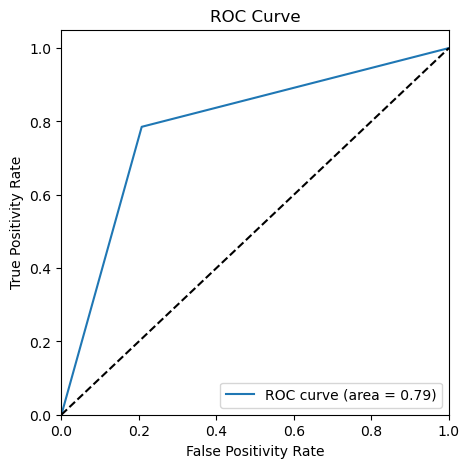

In [4595]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Predicted)

In [4597]:
#### Sensitivity
Sensitivity = TP/(TP+FN)
Sensitivity

0.7852184565128624

In [4599]:
#### Specificity
Specificity = TN/(TN+FP)
Specificity

0.7927519818799547

In [4601]:
#### False positivity Rate
print(FP/(FP+TN))

0.2072480181200453


In [4603]:
#### Total positive prediction
print(TP/(TP+FP))

0.7779126213592233


In [4605]:
### Total False prediction
print(TN/(TN+FN))

0.7996953541507997


In [4607]:
#### Precision
precision_score(y_train_pred_final.Lead, y_train_pred_final.Predicted)

0.7779126213592233

In [4609]:
#### Recall
recall_score(y_train_pred_final.Lead, y_train_pred_final.Predicted)

0.7852184565128624

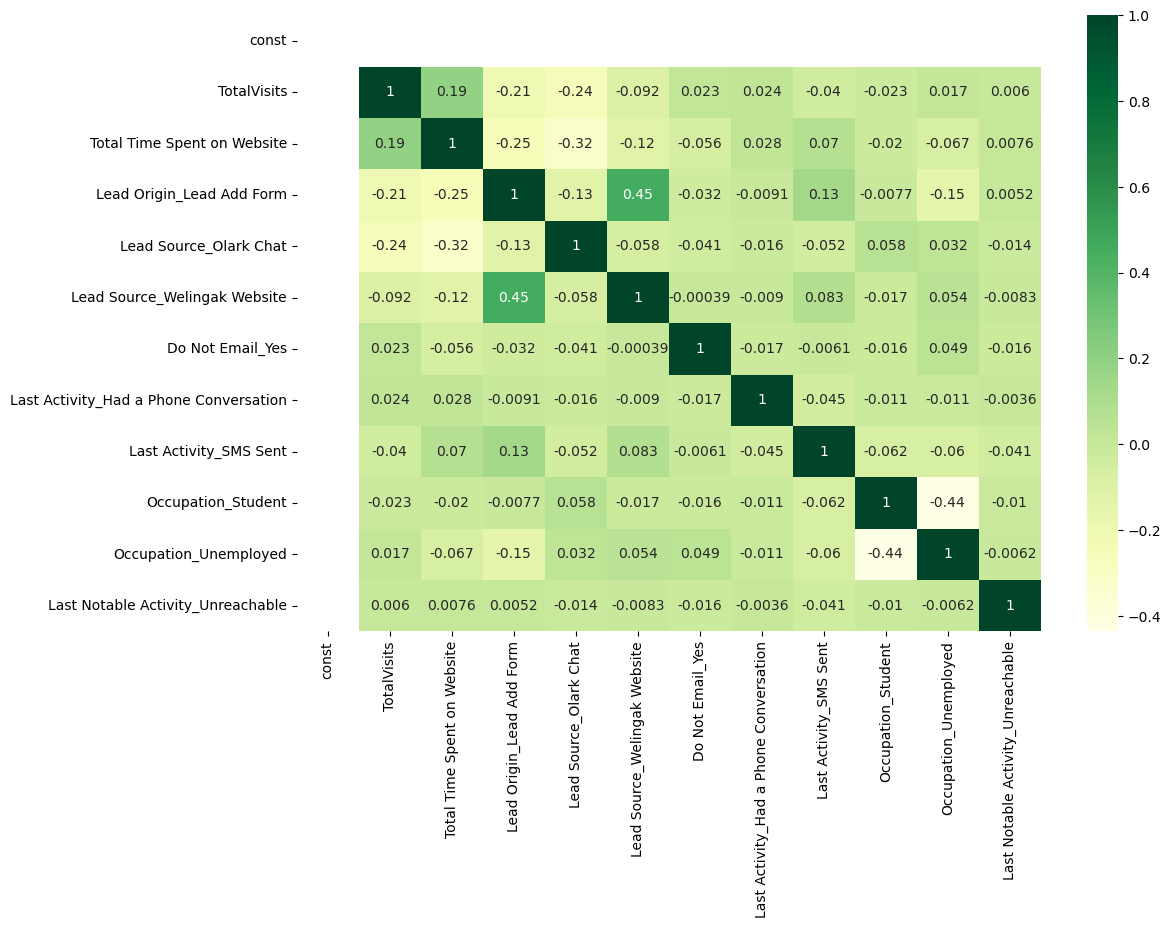

In [4577]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train_sm.corr(), annot=True, cmap="YlGn")
plt.show()

In [4611]:
#### Precision & Recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_prob)

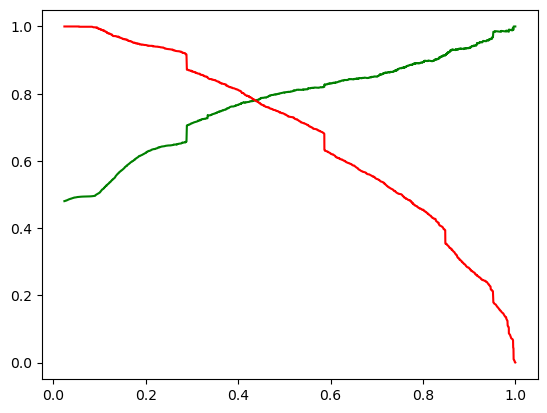

In [4613]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the Test set

In [4364]:
#### Scaling test set
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [4365]:
X_test = X_test[cols]

In [4366]:
X_test_sm = sm.add_constant(X_test)

In [4367]:
y_test_pred = res5.predict(X_test_sm)

In [4368]:
### converting y_test_pred to data frame
y_pred_l = pd.DataFrame(y_test_pred)

In [4369]:
### converting y_test to data frame
y_test_df = pd.DataFrame(y_test)

In [4370]:
### Putting Lead Number to y_test
y_test_df["Lead Number"] = y_test_df.index
y_test_df.head()

,Converted,Lead Number
4771,1,4771
6122,0,6122
9202,0,9202
6570,1,6570
2668,1,2668


In [4371]:
#### Removing index in both the data frames
y_pred_l.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [4372]:
#### appending y_pred_l & y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_l], axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4771,0.995907
1,0,6122,0.229912
2,0,9202,0.794500
3,1,6570,0.407151
4,1,2668,0.864996


In [4373]:
### renaming column 0 to Lead_Prob
y_pred_final = y_pred_final.rename(columns={"Converted": "Lead", 0: "Lead_Prob"})

In [4374]:
### re-arranging the columns
y_pred_final = y_pred_final.reindex(["Lead Number", "Lead", "Lead_Prob"], axis=1)

In [4615]:
y_pred_final["final_predicted"] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [4617]:
#### accuracy score of test dataset
accuracy_test = metrics.accuracy_score(y_pred_final.Lead, y_pred_final.final_predicted)
accuracy_test

0.7631372549019608

In [4619]:
#### confusion matrix of test dataset
confusion_test = metrics.confusion_matrix(y_pred_final.Lead, y_pred_final.final_predicted)
confusion_test

array([[463, 196],
       [106, 510]], dtype=int64)

In [4621]:
TP_test = confusion_test[1,1]
TN_test = confusion_test[0,0]
FP_test = confusion_test[0,1]
FN_test = confusion_test[1,0]

In [4623]:
#### Sensitivity of test dataset
print(TP_test/(TP_test + FN_test))

0.827922077922078


In [4625]:
### Specificity of test
print(TN_test/(TN_test + FP_test))

0.7025796661608498


In [4628]:
#### False positivity Rate
print(FP_test/(FP_test+TN_test))

0.29742033383915023


In [4630]:
#### Total positive prediction
print(TP_test/(TP_test+FP_test))

0.7223796033994334


In [4632]:
### Total False prediction
print(TN_test/(TN_test+FN_test))

0.8137082601054482


In [4636]:
#### Precision
precision_score(y_pred_final.Lead, y_pred_final.final_predicted)

0.7223796033994334

In [4638]:
#### Recall
recall_score(y_pred_final.Lead, y_pred_final.final_predicted)

0.827922077922078